In [3]:
import spacy 

nlp = spacy.load('en_core_web_sm')
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [4]:
sentence = 'Daniil Medvedev and Novak Djokovic have built an intriguing rivalry since the Australian Open decider, which the Serb won comprehensively.'
doc = nlp(sentence)

from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)



In [5]:
[(X, X.ent_iob_, X.ent_type_) for X in doc if X.ent_type_]

[(Daniil, 'B', 'PERSON'),
 (Medvedev, 'I', 'PERSON'),
 (Novak, 'B', 'PERSON'),
 (Djokovic, 'I', 'PERSON'),
 (Australian, 'B', 'NORP'),
 (Serb, 'B', 'NORP')]

In [6]:
spacy.explain("NORP")

'Nationalities or religious or political groups'

In [7]:
import pandas as pd
train = pd.read_pickle('objects/train.pkl')

In [8]:
hardware_train =  pd.read_pickle('objects/hardware_train.pkl')
len(hardware_train)

21155

In [9]:
app_train =  pd.read_pickle('objects/app_train.pkl')
app_train

[('show music store phone like want store music phone',
  {'entities': [(5, 10, 'APP'), (39, 44, 'APP')]}),
 ('watchos make watch pointless browsing music phone via watch reason buying it useless',
  {'entities': [(38, 43, 'APP')]}),
 ('update io iphone icloud backup greyed can not turn say last backup never',
  {'entities': [(17, 23, 'APP')]}),
 ('bug calendar app fix upgraded io still crash io',
  {'entities': [(4, 12, 'APP')]}),
 ('do apple music apple podcast regardless save phone stream',
  {'entities': [(9, 14, 'APP')]}),
 ('music podcast skip around like cd distorts clear second happens io',
  {'entities': [(0, 5, 'APP')]}),
 ('new io resolve calendar problem iosfail', {'entities': [(15, 23, 'APP')]}),
 ('way opt imessage facetime initial setup iphone',
  {'entities': [(17, 25, 'APP')]}),
 ('calendar app work io see month shuts iphone se',
  {'entities': [(0, 8, 'APP')]}),
 ('update phone last night stuck headphone mode cant hear anything video facetime call sound go',
  {'entit

In [10]:
# trainData= app_train
trainData= hardware_train

In [11]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(hardware_train, test_size = 0.2, random_state = 1)
# from sklearn.model_selection import train_test_split
# training_set, test_set = train_test_split(app_train, test_size = 0.2, random_state = 1)

In [15]:
import spacy
from spacy.tokens import DocBin
from tqdm import tqdm
nlp = spacy.blank("en")
db = DocBin() 
for text, annot in tqdm(test_set): 
    doc = nlp.make_doc(text) 
    ents = []
    for start, end, label in annot["entities"]: 
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    try:
        doc.ents = ents 
        db.add(doc)
    except:
        print(text, annot)
db.to_disk("hardware_train/dev.spacy") 

 36%|███▌      | 1504/4231 [00:00<00:00, 3017.69it/s]

Skipping entity


 66%|██████▌   | 2787/4231 [00:00<00:00, 2991.83it/s]

Skipping entity


100%|██████████| 4231/4231 [00:01<00:00, 3035.63it/s]


In [12]:
import spacy

nlp = spacy.load("app_train/model-last/")

In [13]:
sentence = """show music store phone like want store music phone."""

doc = nlp(sentence)

from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)

In [1]:
import spacy

nlp2 = spacy.load("hardware_train/model-last/")

In [17]:
sentence = """show music store iphone like want store music iphone."""

doc = nlp2(sentence)

from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)

In [2]:
import pandas as pd
import numpy as np


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
print(f'gensim: {gensim.__version__}')


from nltk.tokenize import word_tokenize 
from nltk.tokenize import TweetTokenizer
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import get_tmpfile

from tempfile import mkdtemp
import pickle
import joblib


import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)


import os
import yaml
import collections
import scattertext as st
import math


from tqdm.notebook import tqdm
tqdm.pandas()


processed_inbound = pd.read_pickle('objects/processed_inbound.pkl')
processed = pd.read_pickle('objects/processed.pkl')


with open(r'objects/intents.yml') as file:
    intents = yaml.load(file, Loader=yaml.FullLoader)


print(f'\nintents:\n{intents}')
print(f'\nprocessed:\n{processed.head()}')

gensim: 4.1.2

intents:
{'battery': ['battery', 'power'], 'forgot_password': ['password', 'account', 'login'], 'payment': ['credit', 'card', 'payment', 'pay'], 'repair': ['repair', 'fix', 'broken'], 'update': ['update']}

processed:
                                    Processed Inbound  \
0   [new, update, i️, make, sure, download, yester...   
6   [hey, anyone, else, upgraded, io, issue, capit...   
12  [hello, internet, someone, explain, symbol, ke...   
13  [get, screenshot, say, iphonex, reserve, email...   
15  [thank, update, phone, even, slow, barely, wor...   

                                         Real Inbound  \
0   @AppleSupport The newest update. I️ made sure ...   
6   Hey @AppleSupport and anyone else who upgraded...   
12  Hello, internet. Can someone explain why this ...   
13  @AppleSupport I’ve got a screenshot saying my ...   
15  Thank you @AppleSupport I updated my phone and...   

                                        Real Outbound  
0   @115854 Lets take a c

In [2]:
processed_inbound.head(12)

0     [new, update, i️, make, sure, download, yester...
6     [hey, anyone, else, upgraded, io, issue, capit...
12    [hello, internet, someone, explain, symbol, ke...
13    [get, screenshot, say, iphonex, reserve, email...
15    [thank, update, phone, even, slow, barely, wor...
19    [need, software, update, urgently, battery, la...
21         [hi, go, youtube, lose, do, thanks, support]
25    [hey, last, time, download, update, freak, pho...
26                [find, option, get, it, always, play]
27      [app, still, longer, able, control, lockscreen]
29           [need, something, battery, life, suck, as]
32       [i️, keep, change, i️, stop, 🤦🏽‍♀, ️, anybody]
Name: inbound_text, dtype: object

In [3]:
import spacy 

nlp = spacy.load('en_core_web_sm')
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
sentence = 'Daniil Medvedev and Novak Djokovic have built an intriguing rivalry since the Australian Open decider, which the Serb won comprehensively.'
doc = nlp(sentence)

from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)

In [ ]:
extracted_entities = []


for ent in doc.ents:
    extracted_entities.append((ent.text, ent.start_char, ent.end_char, ent.label_))

In [3]:
temp=[]
for sentence in processed_inbound:
    
    new_sentence=" ".join(sentence)
    temp.append(new_sentence)

In [4]:
temp

['new update i️ make sure download yesterday',
 'hey anyone else upgraded io issue capital i️ mail app put',
 'hello internet someone explain symbol keep appear phone i️ try type letter i️ also',
 'get screenshot say iphonex reserve email say happen',
 'thank update phone even slow barely work thank ruin phone',
 'need software update urgently battery last literally half day 🙍🏼',
 'hi go youtube lose do thanks support',
 'hey last time download update freak phone give hell recommendation',
 'find option get it always play',
 'app still longer able control lockscreen',
 'need something battery life suck as',
 'i️ keep change i️ stop 🤦🏽\u200d♀ ️ anybody',
 'thanks thing still like cent credit let zero credit',
 'hello need help regard region change apple id',
 'time try two different apple id still show phone',
 'iphone yes io checked update none available swipe close app several time restart',
 'get white screen nothing load short time close crash thanks reply',
 'phone app work thank u

In [9]:
from spacy import displacy
count=0
extracted_entities = []
temp2=[]
for sentence in temp:
    
    doc = nlp2(sentence)
    


    
    for ent in doc.ents:
        extracted_entities.append((ent.text, ent.start_char, ent.end_char, ent.label_))
        temp2.append(ent.text)


In [10]:
temp2

['iphone',
 'iphone',
 'iphone',
 'watch',
 'watch',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'watch',
 'iphone',
 'watch',
 'ipad',
 'iphone',
 'iphone',
 'iphone',
 'watch',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'iphones',
 'iphone',
 'iphone',
 'iphone',
 'iphones',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'watch',
 'watch',
 'iphone',
 'watch',
 'iphone',
 'iphone',
 'iphone',
 'macbook pro',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'watch',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'ipad',
 'watch',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'mac',
 'macbook pro',
 'iphone',
 'airpods',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'ipad',
 'iphone',
 'watch',
 'iphone',
 'iphone',
 'iphone',
 'iphone',
 'mac',
 'iphone',
 'iphone',
 'iphone',
 'iphone'

In [11]:


def top10_bagofwords(data, output_name, title):
    ''' Taking as input the data and plots the top 10 words based on counts in this text data'''
    bagofwords = CountVectorizer()
    inbound = bagofwords.fit_transform(data)
    inbound 
    word_counts = np.array(np.sum(inbound, axis=0)).reshape((-1,))
    words = np.array(bagofwords.get_feature_names_out())
    words_df = pd.DataFrame({"word":words, 
                             "count":word_counts})
    words_rank = words_df.sort_values(by="count", ascending=False)
    
    words_rank.head()
    
    plt.figure(figsize=(12,6))
    
   
    sns.barplot(x=words_rank['word'][:10], y=words_rank['count'][:10], palette = 'inferno')
    plt.title(title)
    
    
    plt.savefig(f'visualizations/{output_name}.png')
    
    plt.show()

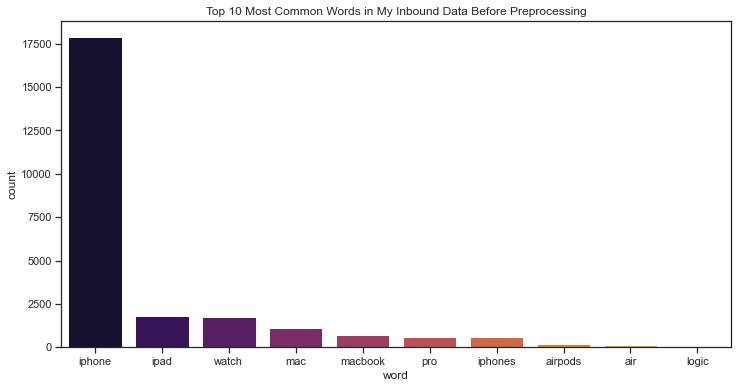

In [12]:
top10_bagofwords(temp2, 'most_common_before' ,'Top 10 Most Common Words in My Inbound Data Before Preprocessing')